In [7]:
import netCDF4     
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
plt.rcParams['figure.figsize'] = 15,8

#read grid paramenters
grid_Small=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')

#lon and lat to np array
lon=np.array(grid_Small.variables['LON'][0,0,2:101,2:182])
lat=np.array(grid_Small.variables['LAT'][0,0,2:101,2:182])
dic_coef={'BAP':1,'PM25':1,'PM10':1,'NO2':1.912,'NO':1.24,'O3':2,'SO2':2.66,'CO':1.160}

In [2]:
pollutants=['BAP','CO','NO','NO2','O3','PM','SO2']
dic_FUME={}
for i in pollutants:
    if i == 'PM':
       dic_FUME['PM25']=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/LIFEIP_Small_PM_2015').variables['PM25']),axis=0)[0,2:101,2:182]*dic_coef['PM25']
       dic_FUME['PM10']=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/LIFEIP_Small_PM_2015').variables['PM10']),axis=0)[0,2:101,2:182]*dic_coef['PM10']
    else:
       dic_FUME[i]=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/LIFEIP_Small_{0}_2015'.format(i)).variables[i]),axis=0)[0,2:101,2:182]*dic_coef[i] 
pollutants=['BAP','CO','NO','NO2','O3','PM','SO2']
dic_SMOKE={}
for i in pollutants:
    if i == 'PM':
       dic_SMOKE['PM25']=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/Joh_Small_PM_2015').variables['PM25']),axis=0)[0,2:101,2:182]*dic_coef['PM25'] 
       dic_SMOKE['PM10']=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/Joh_Small_PM_2015').variables['PM10']),axis=0)[0,2:101,2:182]*dic_coef['PM10'] 
    else:
       dic_SMOKE[i]=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/Joh_Small_{0}_2015'.format(i)).variables[i]),axis=0)[0,2:101,2:182]*dic_coef[i]  

In [3]:
#CAMX
CAMX=netCDF4.Dataset('/media/sf_Share/TERKA/Life-MP_ref2015_camxout_avrg.grd02_IL_PMspec.nc')

#lon and lat to np array
lon_C=np.array(CAMX.variables['longitude'][1:100,1:181])
lat_C=np.array(CAMX.variables['latitude'][1:100,1:181])

In [4]:
dic_CAMX={}
for i in dic_FUME:
    if i != 'BAP':
        if i == 'PM25':
           dic_CAMX[i]=np.average(np.array(CAMX.variables['PM2_5']),axis=0)[0,1:100,1:181]
        else:
           dic_CAMX[i]=np.average(np.array(CAMX.variables[i]),axis=0)[0,1:100,1:181]  


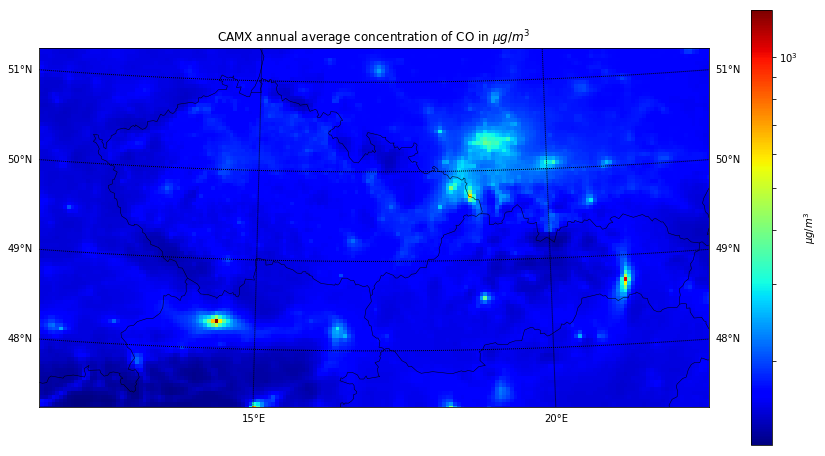

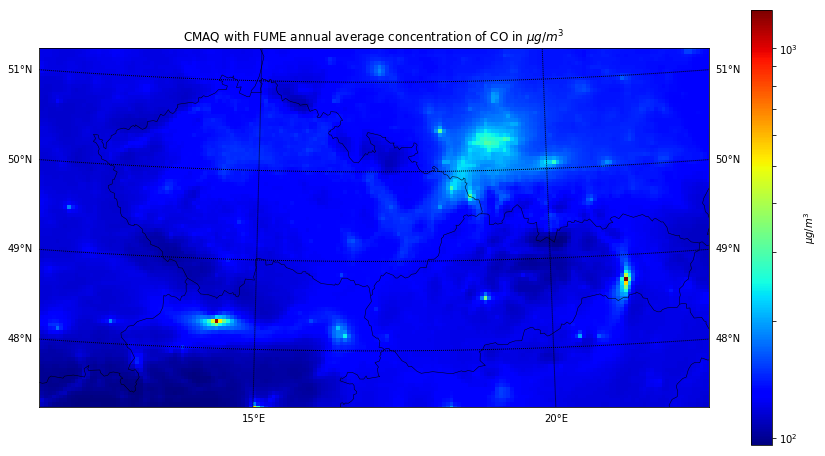

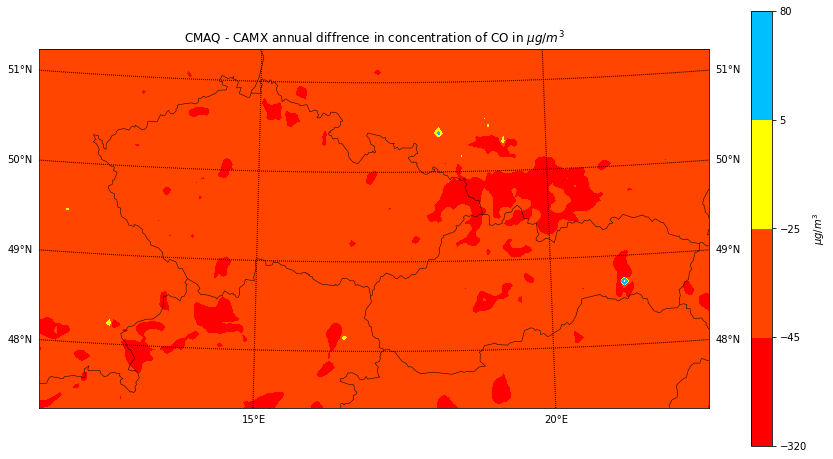

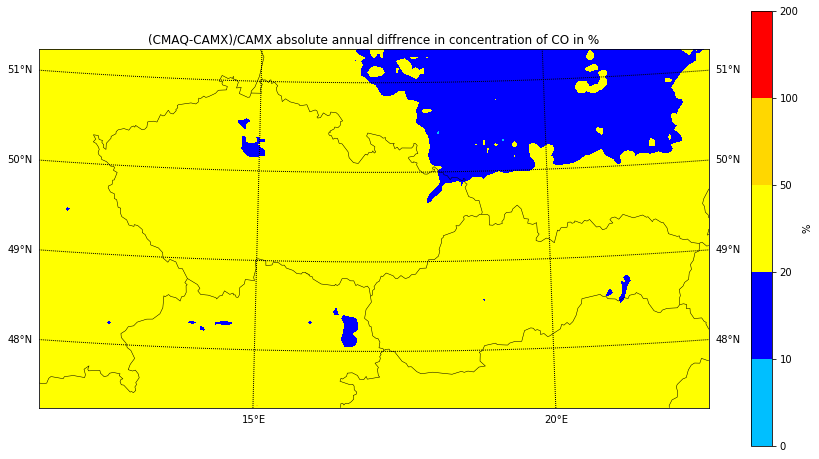

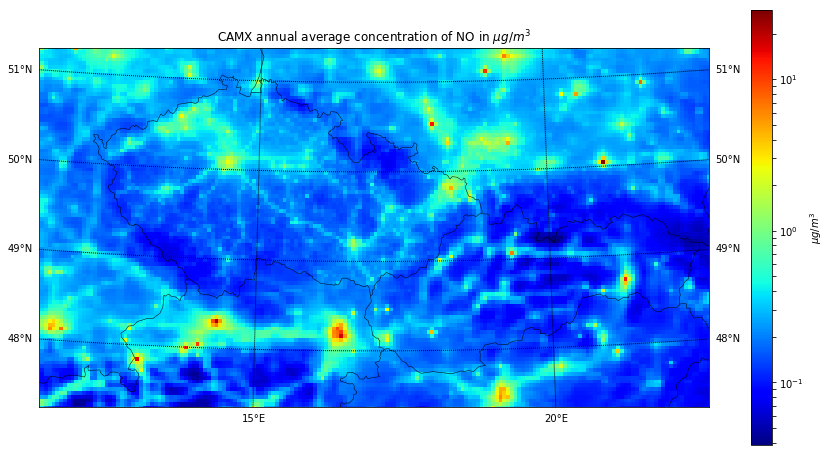

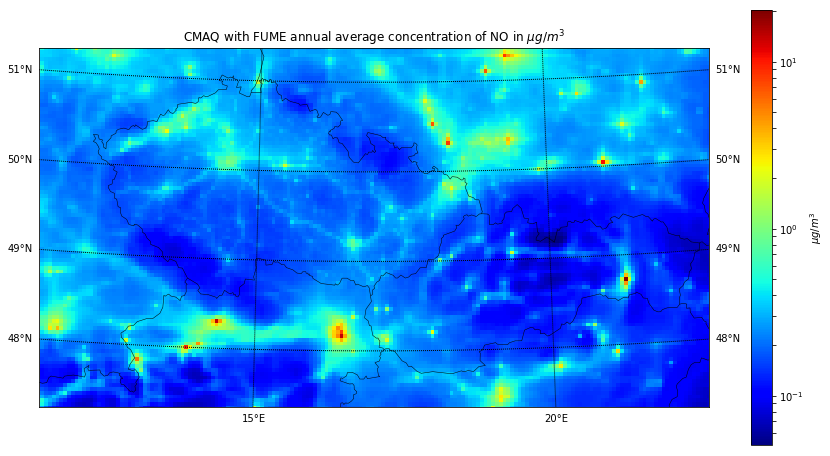

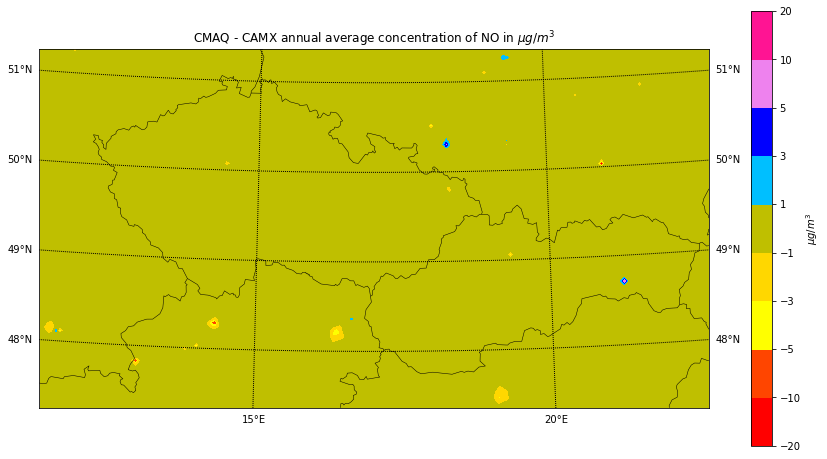

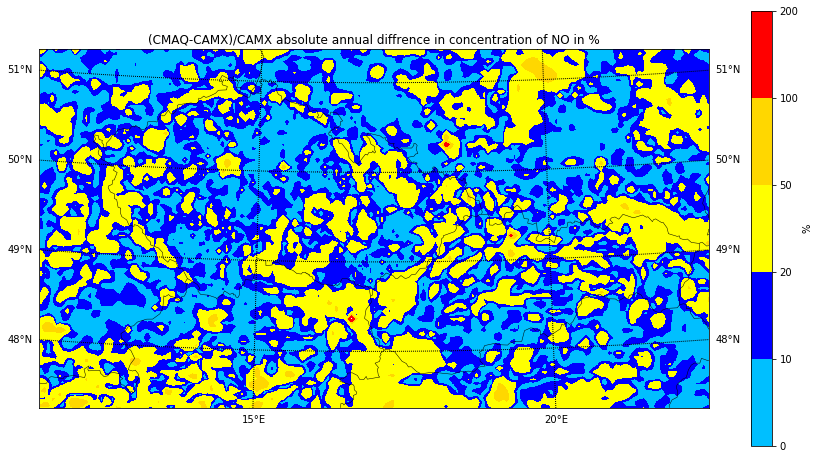

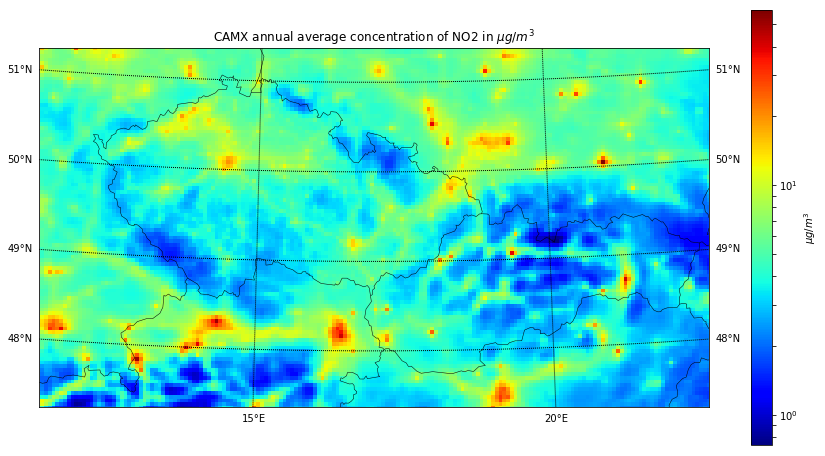

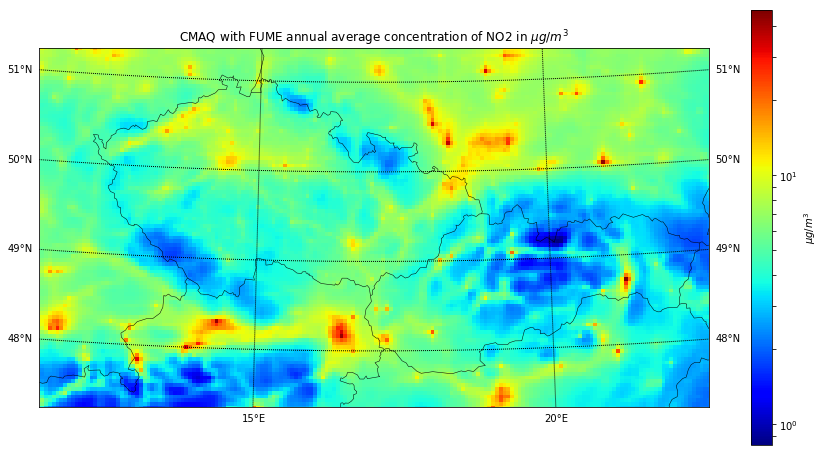

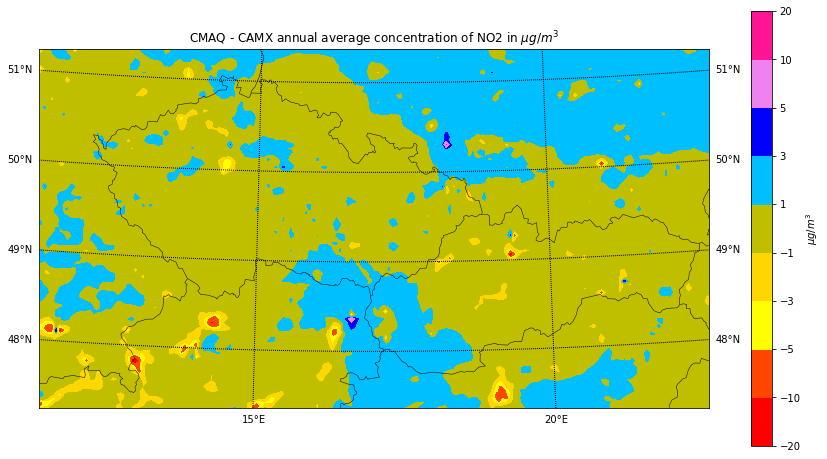

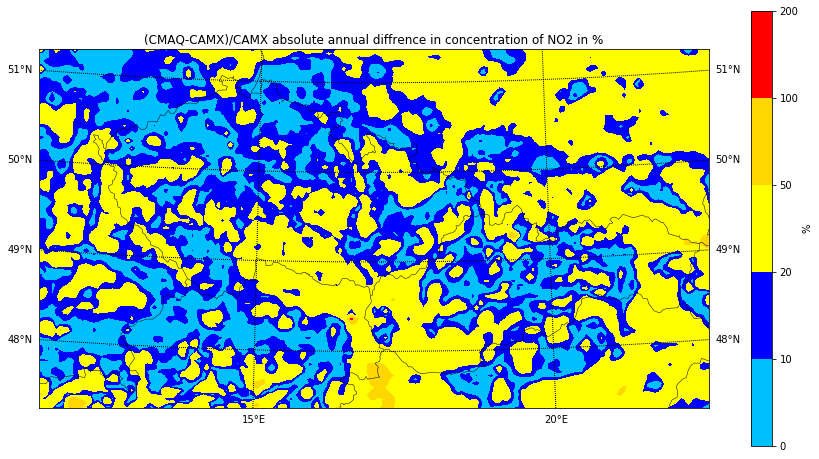

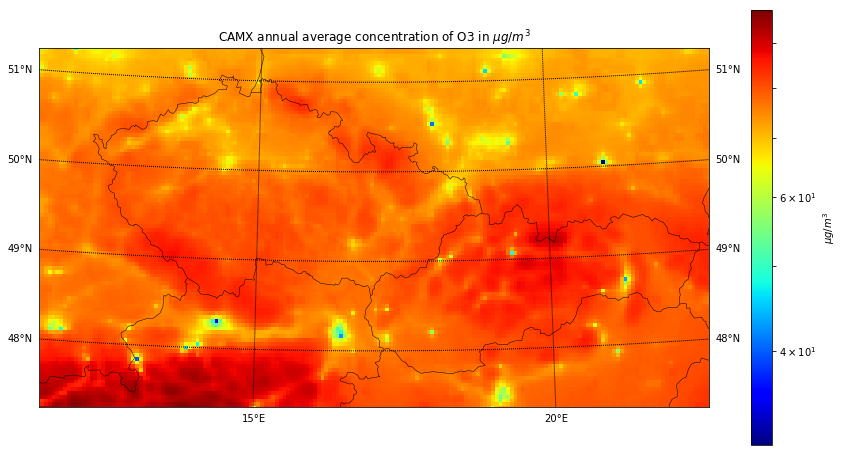

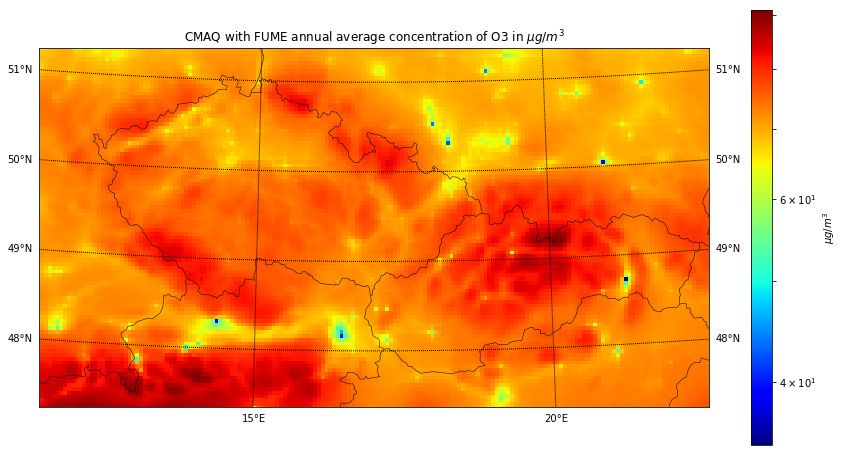

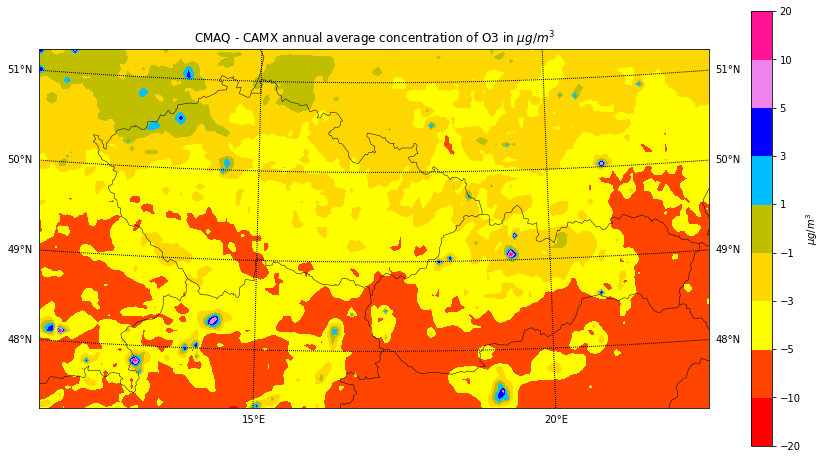

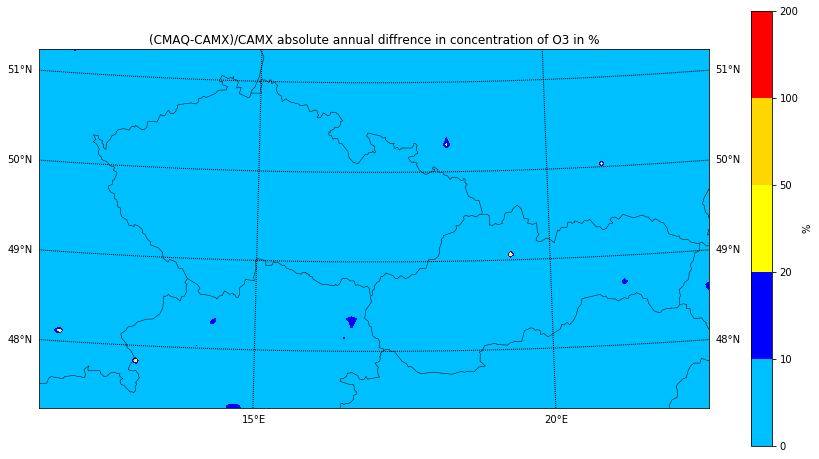

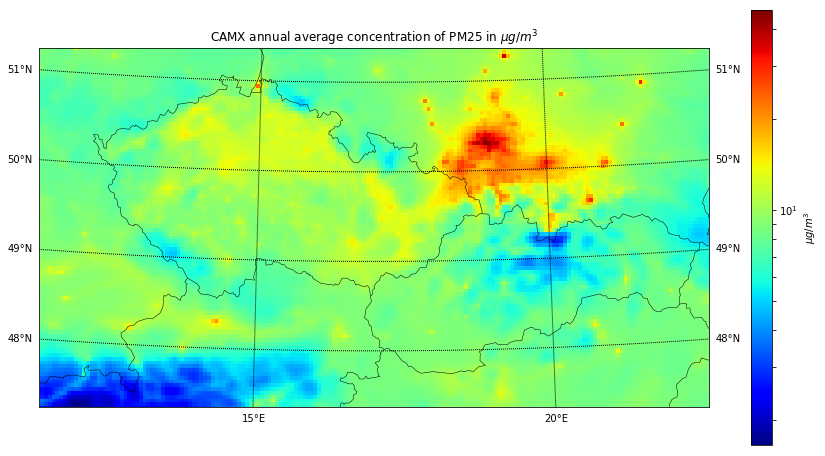

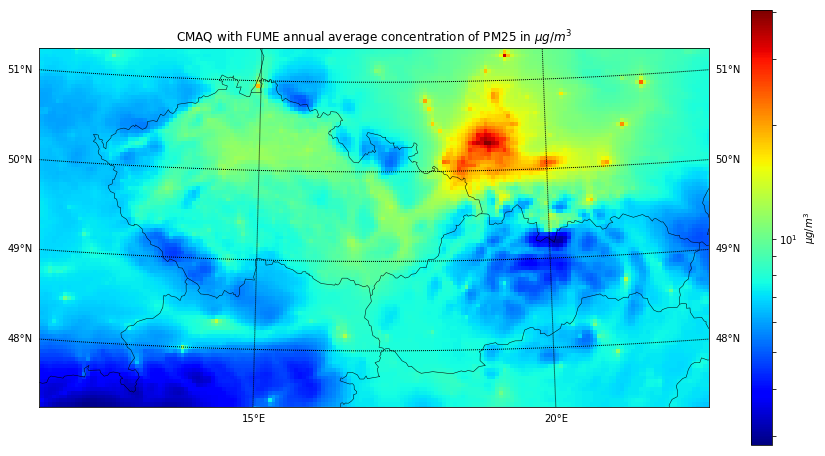

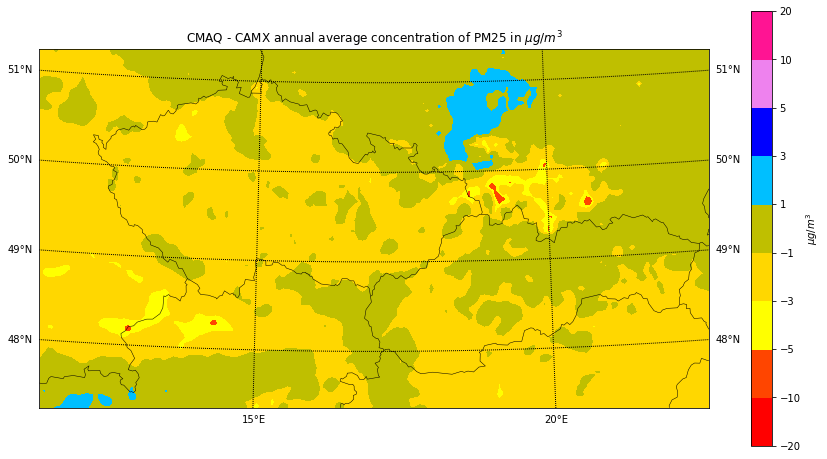

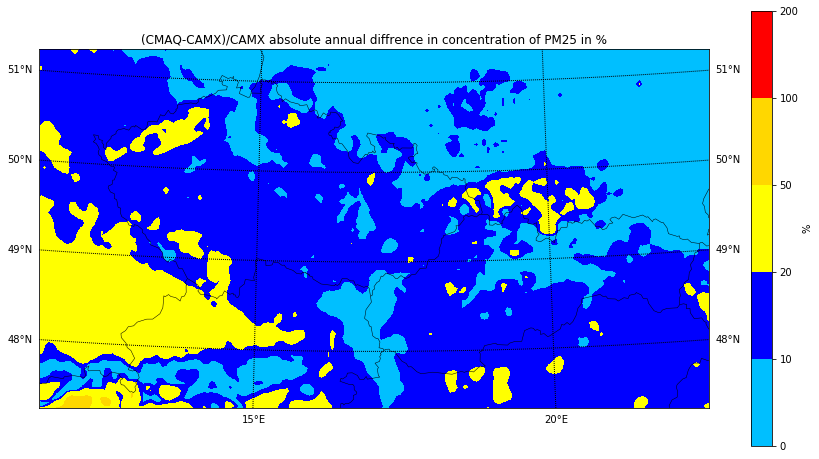

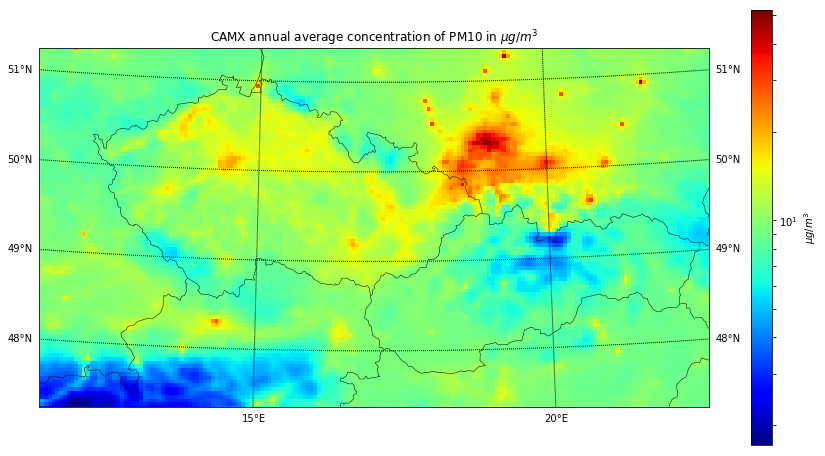

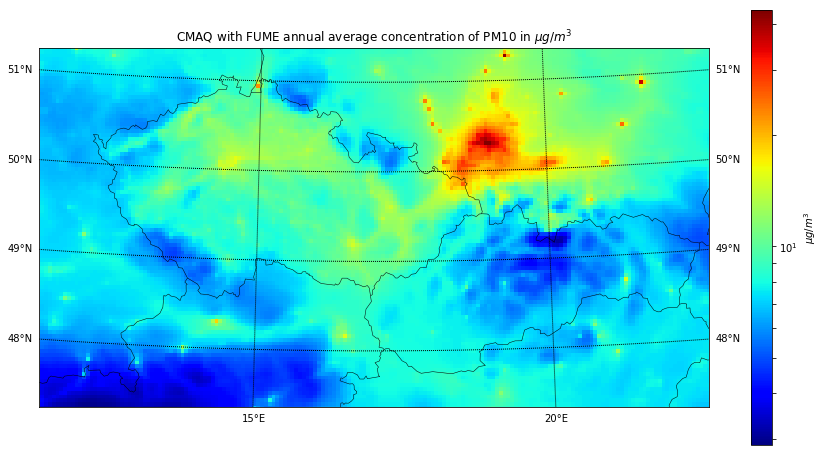

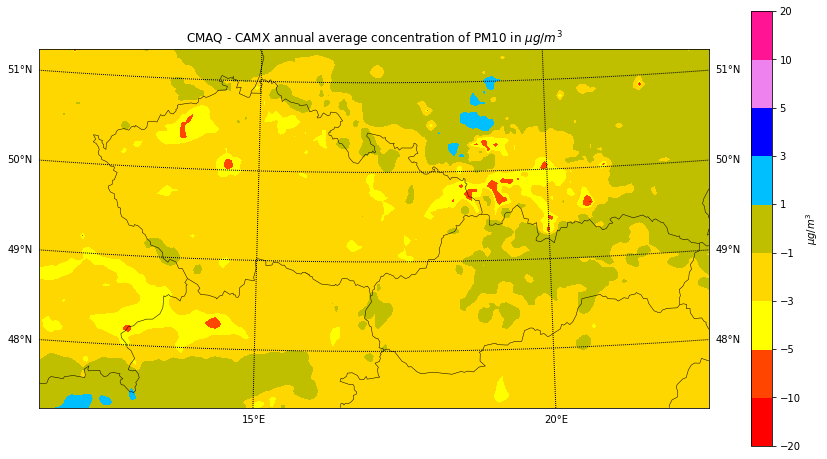

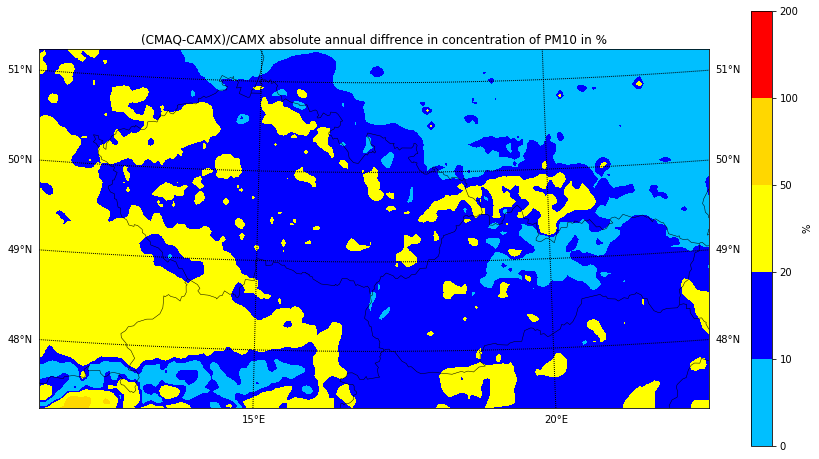

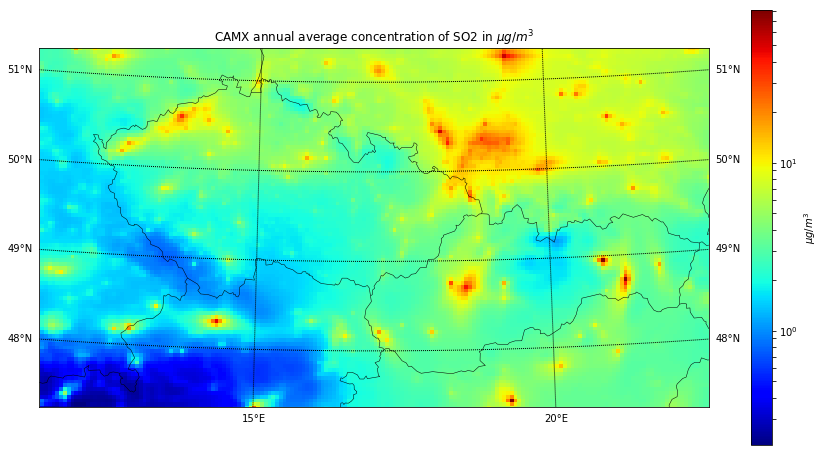

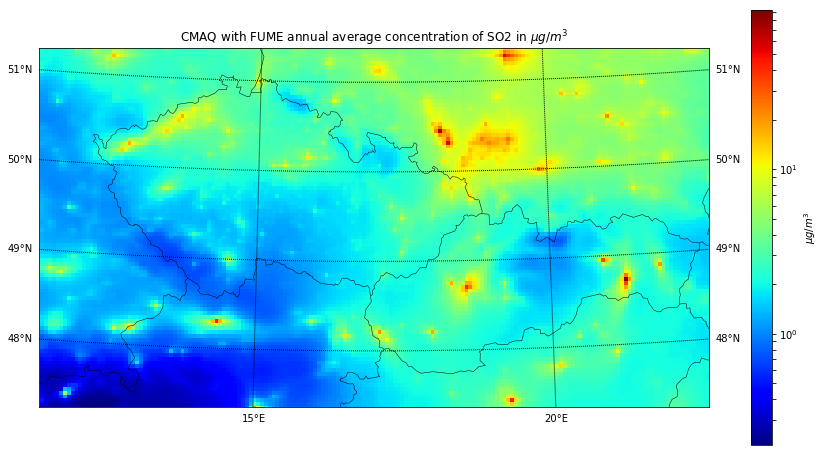

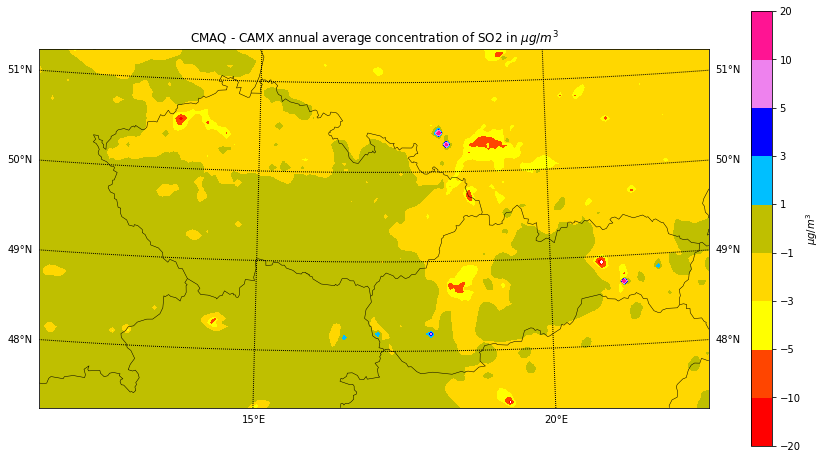

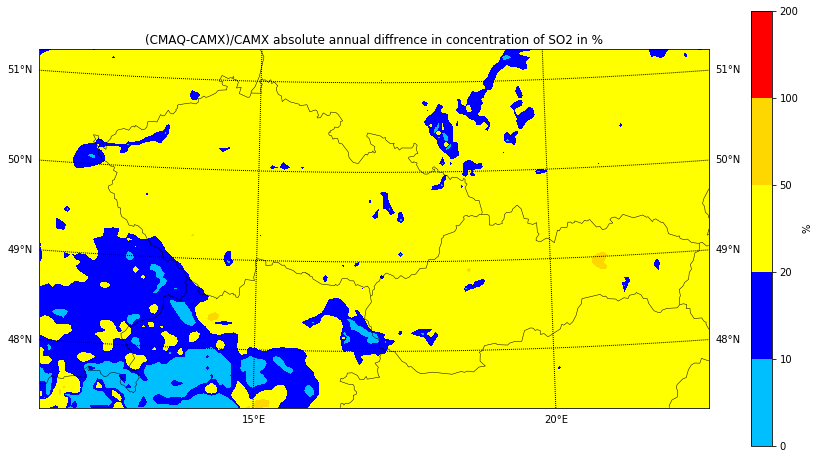

In [10]:
meridians = np.arange(10.,35.,5.)
pararels = np.arange(45.,52.,1.)


for i in dic_FUME.keys():
    if i != 'BAP':         
        mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=833000,height=446351,resolution='i')
        mapb.drawcountries()
        mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
        mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])

        # choose one of the two style of the plot
        mapb.pcolormesh(lon_C,lat_C,dic_CAMX[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='$\mu g /m^3$')
        plt.title('CAMX annual average concentration of {0} in $\mu g /m^3$'.format(i))
        plt.show()
        plt.close()  
        
        
        mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=832900,height=446351,resolution='i')
        mapb.drawcountries()
        mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
        mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])

        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_FUME[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='$\mu g /m^3$')
        plt.title('CMAQ with FUME annual average concentration of {0} in $\mu g /m^3$'.format(i))
        plt.show()
        plt.close() 
        
        if i != 'CO':
            colors_m=['red','orangered','yellow','gold','y','deepskyblue','blue','violet','deeppink']
            levels=[-20,-10,-5,-3,-1,1,3,5,10,20]
            mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=832900,height=446351,resolution='i')
            mapb.drawcountries()
            mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
            mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])

            # choose one of the two style of the plot
            mapb.contourf(lon,lat,dic_FUME[i]-dic_CAMX[i],levels,colors=colors_m,latlon=True) 
            #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

            plt.colorbar(label='$\mu g /m^3$')
            plt.title('CMAQ - CAMX annual average concentration of {0} in $\mu g /m^3$'.format(i))
            plt.show()
            plt.close()
        else:
            colors_m=['red','orangered','yellow','deepskyblue','blue']
            levels=[-320,-45,-25,5,80]
            mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=832900,height=446351,resolution='i')
            mapb.drawcountries()
            mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
            mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])

            # choose one of the two style of the plot
            mapb.contourf(lon,lat,dic_FUME[i]-dic_CAMX[i],levels,colors=colors_m,latlon=True) 
            #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

            plt.colorbar(label='$\mu g /m^3$')
            plt.title('CMAQ - CAMX annual diffrence in concentration of {0} in $\mu g /m^3$'.format(i))
            plt.show()
            plt.close()
            
        colors_m=['deepskyblue','blue','yellow','gold','red','orangered']
        levels=[0,10,20,50,100,200]    

        mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=832900,height=446351,resolution='i')
        mapb.drawcountries()
        mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
        mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])

        # choose one of the two style of the plot
        mapb.contourf(lon,lat,np.abs((dic_FUME[i]-dic_CAMX[i])/dic_CAMX[i])*100,levels,colors=colors_m,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='%')
        plt.title('(CMAQ-CAMX)/CAMX absolute annual diffrence in concentration of {0} in %'.format(i))
        plt.show()
        plt.close()
